In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
file_path = '..//Datasets//bank churn//'
bank = pd.read_csv(file_path + 'train.csv', index_col = 'id')
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## From Kaggle

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

**Customer ID**: A unique identifier for each customer 

**Surname**: The customer's surname or last name 

**Credit Score**: A numerical value representing the customer's credit score 

**Geography**: The country where the customer resides (France, Spain or Germany)

**Gender**: The customer's gender (Male or Female)

**Age**: The customer's age.

**Tenure**: The number of years the customer has been with the bank

**Balance**: The customer's account balance

**NumOfProducts**: The number of bank products the customer uses (e.g., savings account, credit card)

**HasCrCard**: Whether the customer has a credit card (1 = yes, 0 = no)

**IsActiveMember**: Whether the customer is an active member (1 = yes, 0 = no)

**EstimatedSalary**: The estimated salary of the customer

**Exited**: Whether the customer has churned (1 = yes, 0 = no)

In [3]:
targ_cols = ['Exited']
feat_cols = [col for col in bank.columns if col not in targ_cols]

num_cols = [col for col in feat_cols if bank[col].dtype in ['int64', 'float64']]
bank[num_cols].corr()*100

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CustomerId,100.000000,0.736402,0.269608,-0.125237,-0.834842,0.437993,-0.546894,-0.293404,0.289126
CreditScore,0.736402,100.000000,-0.891815,0.094248,0.697305,1.136081,-0.282776,1.479026,-0.182030
Age,0.269608,-0.891815,100.000000,-1.083035,6.431829,-10.219491,-1.211133,0.331956,-0.539866
Tenure,-0.125237,0.094248,-1.083035,100.000000,-0.948119,0.733483,0.532662,-0.553226,0.097059
Balance,-0.834842,0.697305,6.431829,-0.948119,100.000000,-36.103252,-1.858401,-1.507349,0.858620
NumOfProducts,0.437993,1.136081,-10.219491,0.733483,-36.103252,100.000000,0.548228,3.973607,-0.428509
HasCrCard,-0.546894,-0.282776,-1.211133,0.532662,-1.858401,0.548228,100.000000,-2.103379,0.443822
IsActiveMember,-0.293404,1.479026,0.331956,-0.553226,-1.507349,3.973607,-2.103379,100.000000,-0.808005
EstimatedSalary,0.289126,-0.182030,-0.539866,0.097059,0.858620,-0.428509,0.443822,-0.808005,100.000000


array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

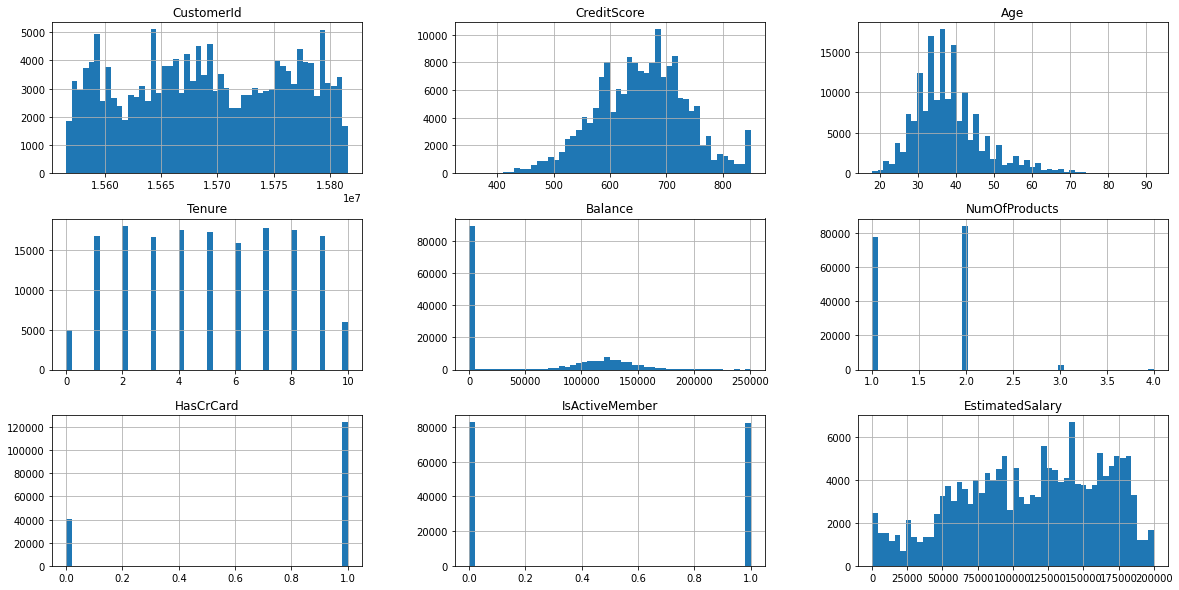

In [4]:
bank[num_cols].hist(bins = 50, figsize = (20, 10))

We can see that there in the extremities of the credit score and balance, there are spikes. This is because the maximum credit score one can have is 850, and, while it is possible to have negative balance, it will be written as 0. 

In [8]:
bank.CreditScore.max()

850

In [16]:
max_cscore = [row for row in bank.index if bank.CreditScore.iloc[row] == 850]
min_bal = [row for row in bank.index if bank.Balance.iloc[row] == 0]
bad_rows = max_cscore + min_bal
print('Outlier rows are {:.2f}% of the total rows'.format(100*len(bad_rows)/len(bank.index)))

Outlier rows are 55.86% of the total rows


We can't just remove it.

In [6]:
bank[feat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 16.4+ MB


<Axes: xlabel='Gender', ylabel='Exited'>

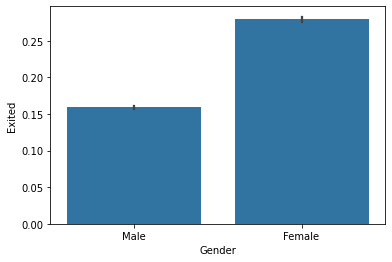

In [7]:
import seaborn as sns

sns.barplot(data = bank, x = 'Gender', y = 'Exited')